In [ ]:
"""
The main research question that I will be addressing for my dataset is given a set of variables 
such as location, time, and contributing factors, what is the probability of injury or 
fatality and which factors have the highest probability of death. My data set covers data on 
vehicle crashes in New York city with many categorical variables. Due to there being an abundance of 
categorical variables I am limited in the models that will work best for this data. The results of 
the research will be significant because it can be applied to road safety and precautions, 
which can also be extended to things such as policy changes. The information gathered from 
results can also be useful to the general population as the results will provide 
information on what makes car crashes more deadly. This can be applied to the average 
vehicle operator's life and will hopefully inform people on how dangerous driving can be. 
Even though some of New York is very urban, there are also some boroughs such as Staten Island, 
Queens, and the Bronx, which have some large suburban areas. As a result of this the research 
results found can still be informative for other cities that may have similar urban/suburban 
structure, levels of walkability, and public transportation available in the United States. 
Choosing to ignore this and similar research will lead to lack of road safety and a societal 
ignorance of vehicle collision related deaths and injuries. 






Data source: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data 

The data that I will be using for the final project covers vehicle crashes in New York city. 
The data from this source has vehicle crashes reported to the New York city police department. 
It is stated that a report must be filed for collisions where someone is injured or killed, or 
where there is at least $1000 worth of damage. This will be something to keep in mind during 
evaluation and explanation of the research as the data will be inherently skewed towards more 
dangerous and destructive vehicle collisions. 

There are numeric columns for time, zip code (which would probably be categorical), longitude, 
latitude, location (both longitude and latitude) as well as injuries and deaths for: persons, 
pedestrians, cyclists, and  motorists. For the time it is in HH:MM format, the number of deaths 
and injuries are just simple numeric integers.

For qualitative variables there is a crash date: Month/day/year format. Borough
which is a string of which borough in NY the crash occurred. On street name, cross street name, 
and off street name. These are all strings of a street for which the crash occurred. There are 5 
contributing factor columns for each crash. These columns include string values for factors that 
are deemed causes of the crash such as unsafe speed, obstruction of view etc. There are a lot 
of "unspecified values" in these columns and a lot of null values for 3, 4, and 5. This will need 
to be addressed in some way for the model. There also are 5 columns for vehicle type code which 
contain string values for the vehicles involved such as sedan, bike, taxi etc.

For the number of observations in my dataset there are about 2 million entries in the full data set. 
The data dates back to July 1st 2012 and has been updated ever since. I downloaded this
data set on september 15th 2025 so that is where my data will end. For the linear
regression model I created a subset of the full data set by randomly grouping 10k rows
of data into a separate csv. I may utilize a larger subset of data for the final
project but it needs to be small enough to upload to github.

This data set is suitable for my project because I am looking to analyze the dangers
of vehicles and causes of crashes in New York city. The dataset is large and rich with different
predictors which with a well performing model can have great explanatory value
for understanding vehicle collisions and what makes them dangerous.


"""






In [ ]:
# 2 EDA 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("vehicle_crash_subset.csv")

df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,CRASH TIME CLEAN
count,9997.000000,9786.000000,9786.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,10909.589877,40.557331,-73.620214,1.439900,0.001400,0.022800,0.000500,0.189700,0.0,1.199700,0.000900,3.417082e+06,13.581000
std,519.265483,2.566869,4.657821,0.970094,0.039977,0.196173,0.022356,0.397655,0.0,1.130287,0.033156,1.590826e+06,5.965668
min,10000.000000,0.000000,-74.246350,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.230000e+02,0.000000
25%,10457.000000,40.660815,-73.963767,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,3.285448e+06,10.000000
50%,11210.000000,40.707131,-73.919894,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,4.036517e+06,15.000000
75%,11239.000000,40.766275,-73.865600,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,4.541157e+06,18.000000
max,11697.000000,40.910900,0.000000,23.000000,2.000000,9.000000,1.000000,3.000000,0.0,23.000000,2.000000,4.846658e+06,23.000000


In [ ]:
"qualitative variables:"

In [ ]:

categorical_columns = df.select_dtypes(include = ['object', 'category']).columns 
df[categorical_columns].head()

# there are a lot of null/missing values from contributing factor vehicles 3,4,5 
# and also vehicle type code 3,4,5 these will mostlikely be removed

,CRASH DATE,CRASH TIME,BOROUGH,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/11/2020,21:54,BRONX,"(40.836147, -73.8542)",STARLING AVENUE,ODELL STREET,NaN,Turning Improperly,Following Too Closely,NaN,NaN,NaN,Sedan,Motorscooter,NaN,NaN,NaN
1,02/26/2014,12:41,BRONX,"(40.8833713, -73.8595535)",BARNES AVENUE,EAST 220 STREET,NaN,Unspecified,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,12/26/2021,7:40,BROOKLYN,"(40.698036, -73.962845)",WILLIAMSBURG STREET WEST,FLUSHING AVENUE,NaN,Following Too Closely,Passenger Distraction,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
3,04/04/2016,10:46,MANHATTAN,NaN,EAST 82 STREET,1 AVENUE,NaN,Driver Inexperience,Following Too Closely,NaN,NaN,NaN,Taxi,Box Truck,NaN,NaN,NaN
4,08/19/2019,16:20,BRONX,"(40.87518, -73.86705)",WHITE PLAINS ROAD,MAGENTA STREET,NaN,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [ ]:
#print(df["BOROUGH"].value_counts())
#print(df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts())
#print(df["CONTRIBUTING FACTOR VEHICLE 2"].value_counts())
#print(df["CONTRIBUTING FACTOR VEHICLE 3"].value_counts())
#print(df["CONTRIBUTING FACTOR VEHICLE 4"].value_counts())
#df["CONTRIBUTING FACTOR VEHICLE 5"].value_counts()
#print(df["VEHICLE TYPE CODE 1"].value_counts())
#print(df["VEHICLE TYPE CODE 2"].value_counts())
#print(df["VEHICLE TYPE CODE 3"].value_counts())
#print(df["VEHICLE TYPE CODE 4"].value_counts())
# a log of values with little observations, i am planning on doing a larger
# sample of data so this may be more meaningful with a larger sample 
""" 
contributing factor vehicle 1 and 2 has good amount of observations for atleast the first 6-7 rows,
unspecified is high though so this may need to be addressed especially in CFH 2

vehcile type code has many observations and less missing valyes for 1 and 2, but 
for 3,4,5 there are decreasing observations with data in these columns 
i need to see if these are crashes that have more vehicles involved, 
or if these are used to further describe single vehicles etc... this can 
aid in deciding what to do with these features. 1 and 2 will be used though. 
"""

VEHICLE TYPE CODE 3
Sedan                                  484
Station Wagon/Sport Utility Vehicle    353
PASSENGER VEHICLE                      277
SPORT UTILITY / STATION WAGON          110
Pick-up Truck                           18
4 dr sedan                              18
UNKNOWN                                 17
Taxi                                    17
Bike                                    13
OTHER                                   13
TAXI                                    11
VAN                                     10
Bus                                     10
BICYCLE                                  7
Box Truck                                7
Van                                      7
BUS                                      6
Moped                                    6
Tractor Truck Diesel                     5
Convertible                              5
Motorcycle                               5
PICK-UP TRUCK                            5
LARGE COM VEH(6 OR MORE TIRES)    

' \ncontributing factor vehicle 1 and 2 has good amount of observations for atleast the first 6-7 rows,\nunspecified is high though so this may need to be addressed especially in CFH 2\n\nvehcile type code \n'

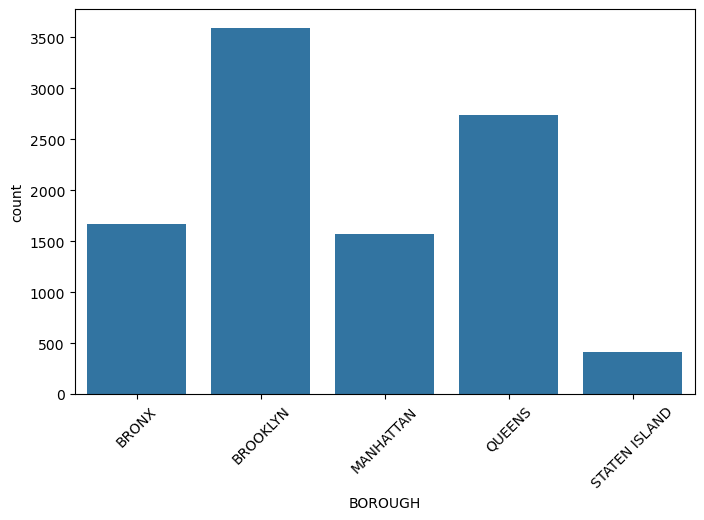

In [ ]:
df['HOUR'] = df["CRASH TIME CLEAN"]
df["ANY FATALITY"] = (df["NUMBER OF PERSONS KILLED"] >0).astype(int)

num_cols = ['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS INJURED',
            'NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED',
    'NUMBER OF MOTORIST KILLED',
    'HOUR'
]

df[num_cols].describe()

""" 



"""


,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,HOUR
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000
mean,1.439900,0.001400,0.022800,0.000500,0.189700,0.0,1.199700,0.000900,13.581000
std,0.970094,0.039977,0.196173,0.022356,0.397655,0.0,1.130287,0.033156,5.965668
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,10.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,15.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,18.000000
max,23.000000,2.000000,9.000000,1.000000,3.000000,0.0,23.000000,2.000000,23.000000


In [ ]:
cat_cols = [
    'BOROUGH',
    'CONTRIBUTING FACTOR VEHICLE 1',
    'VEHICLE TYPE CODE 1'
]

for c in cat_cols:
    print(f"\n Value  counts for {c}:")
    print(df[c].value_counts().head(10))



mValue  counts for BOROUGH:
BOROUGH
BROOKLYN         3597
QUEENS           2742
BRONX            1671
MANHATTAN        1571
STATEN ISLAND     419
Name: count, dtype: int64

mValue  counts for CONTRIBUTING FACTOR VEHICLE 1:
CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       2779
Driver Inattention/Distraction    2277
Failure to Yield Right-of-Way      967
Following Too Closely              505
Traffic Control Disregarded        472
Other Vehicular                    321
Passing or Lane Usage Improper     254
Unsafe Speed                       247
Turning Improperly                 223
Alcohol Involvement                183
Name: count, dtype: int64

mValue  counts for VEHICLE TYPE CODE 1:
VEHICLE TYPE CODE 1
Sedan                                  3208
Station Wagon/Sport Utility Vehicle    2303
PASSENGER VEHICLE                      1648
SPORT UTILITY / STATION WAGON           624
Bike                                    310
Taxi                                    289
TAXI 

In [ ]:
#injuries by borough
injury_by_borough = df.groupby('BOROUGH')['NUMBER OF PERSONS INJURED'].mean().sort_values(ascending=False)
print(injury_by_borough)

# injuries by hour
injury_by_hour = df.groupby('HOUR')['NUMBER OF PERSONS INJURED'].mean()
print(injury_by_hour.head())


BOROUGH
BRONX            1.536206
BROOKLYN         1.457048
QUEENS           1.445660
STATEN ISLAND    1.412888
MANHATTAN        1.295353
Name: NUMBER OF PERSONS INJURED, dtype: float64
HOUR
0.0    1.559420
1.0    1.533679
2.0    1.477612
3.0    1.598485
4.0    1.597403
Name: NUMBER OF PERSONS INJURED, dtype: float64


In [18]:
factor_injury = (
    df.groupby('CONTRIBUTING FACTOR VEHICLE 1')['NUMBER OF PERSONS INJURED']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)
print(factor_injury)


CONTRIBUTING FACTOR VEHICLE 1
Vehicle Vandalism                              4.000000
Animals Action                                 3.000000
Brakes Defective                               2.060606
Lane Marking Improper/Inadequate               2.000000
Traffic Control Device Improper/Non-Working    1.777778
Drugs (illegal)                                1.700000
Prescription Medication                        1.687500
Drugs (Illegal)                                1.666667
Pavement Slippery                              1.645570
Unsafe Speed                                   1.639676
Name: NUMBER OF PERSONS INJURED, dtype: float64


In [ ]:
missing = df.isna().mean().sort_values(ascending=False)
print(missing.head(15))

#drop columns with high missing values as this will not be usable or needed really

VEHICLE TYPE CODE 5              0.9876
CONTRIBUTING FACTOR VEHICLE 5    0.9873
VEHICLE TYPE CODE 4              0.9572
CONTRIBUTING FACTOR VEHICLE 4    0.9566
VEHICLE TYPE CODE 3              0.8568
CONTRIBUTING FACTOR VEHICLE 3    0.8550
OFF STREET NAME                  0.8310
CROSS STREET NAME                0.1698
ON STREET NAME                   0.1693
VEHICLE TYPE CODE 2              0.0346
LOCATION                         0.0214
LONGITUDE                        0.0214
LATITUDE                         0.0214
VEHICLE TYPE CODE 1              0.0011
ZIP CODE                         0.0003
dtype: float64


In [ ]:
df['ANY FATALITY'].value_counts(normalize=True)


ANY FATALITY
0    0.9987
1    0.0013
Name: proportion, dtype: float64

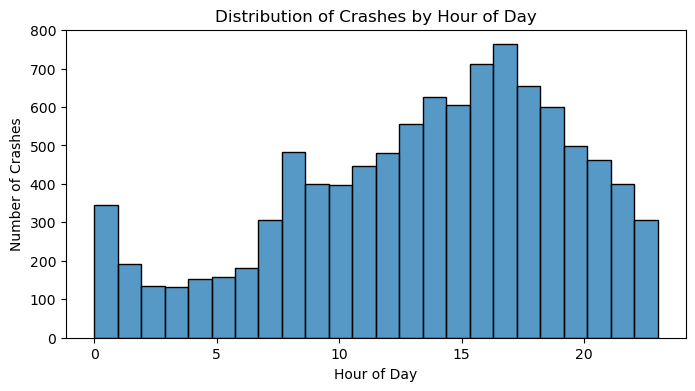

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(df['HOUR'].dropna(), bins=24)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crashes")
plt.title("Distribution of Crashes by Hour of Day")
plt.show()


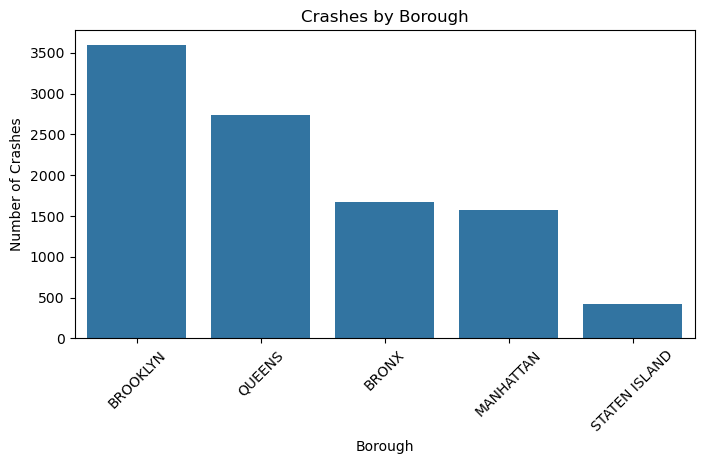

In [23]:
plt.figure(figsize=(8, 4))
borough_counts = df['BOROUGH'].value_counts()
sns.barplot(x=borough_counts.index, y=borough_counts.values)
plt.xlabel("Borough")
plt.ylabel("Number of Crashes")
plt.title("Crashes by Borough")
plt.xticks(rotation=45)
plt.show()


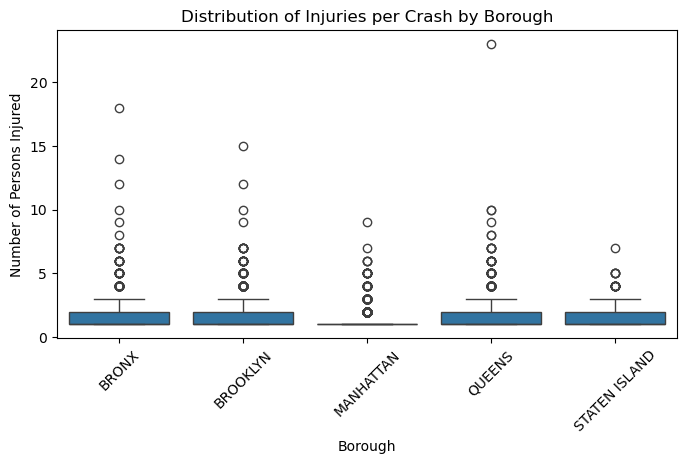

In [24]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='BOROUGH', y='NUMBER OF PERSONS INJURED')
plt.xlabel("Borough")
plt.ylabel("Number of Persons Injured")
plt.title("Distribution of Injuries per Crash by Borough")
plt.xticks(rotation=45)
plt.show()


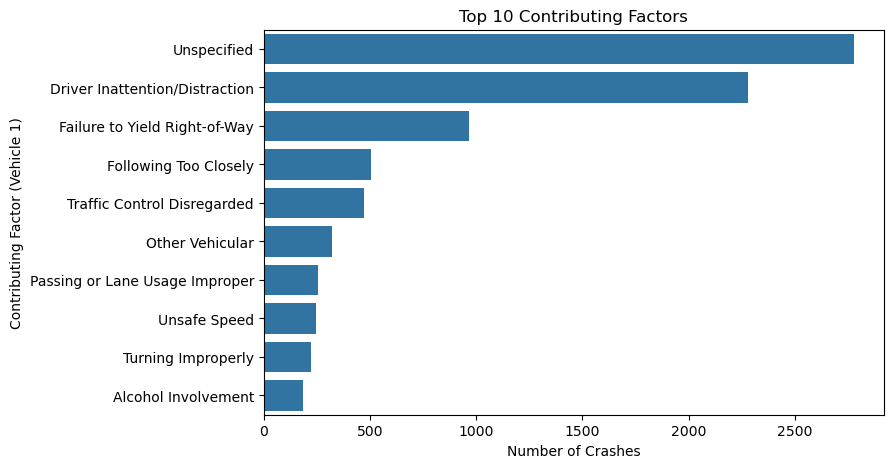

In [25]:
plt.figure(figsize=(8, 5))
top_factors = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
sns.barplot(y=top_factors.index, x=top_factors.values)
plt.xlabel("Number of Crashes")
plt.ylabel("Contributing Factor (Vehicle 1)")
plt.title("Top 10 Contributing Factors")
plt.show()


In [ ]:


#3 Model Selection, Application, and Evaluation 

""" 
For my proposed research question I will be using the logistic regression model. 
My hypothesis is that nighttime and unsafe speed will increase odds of fatalities occurring.
 In addition to this I also hypothesize that peak driving times such as rush hour will 
 increase odds of injuries occurring. For my binary outcome I have 1 for 
 injuries/ fatalities occurring and 0 for none. 
 For my model I will be able to train and test on a large dataset as my original data 
file has about 2 million rows. This will be beneficial as I can have a large sample size 
with enough observations to include many predictors. I will have to test and train my model and 
assess if it is performing similarly on the new data as it did on the training data. Having a 
larger sample size will make the results of the model more trustworthy and less likely to overfit. 
There also needs to be no highly correlated predictors within my model. I will need to assess the 
accuracy of the model. This will allow me to determine how accurate the models predictions are. 
If the model is more accurate I can be more confident in the results and interpretations of the model. 
I will also need to assess the model's F1 score to determine if it has good precision and recall. 
If the model has a high F1 score this will mean that the model correctly predicted true values and 
has a low amount of false positives and negatives.


Model Ideas that I will be doing:
binary targets: any fatality (1=true or 0=false), 
specific models for pedestrian, cyclist, motorists probability of being killed in a crash (1=deaths>1, 0 = no deaths)

predictors to be used: borough, (maybe zip code and lattitude longitude), 
hour, contributing factor vehicle 1 and 2, vehicle type code 1 and 2,
may also add a time of day categorical value of morning, afternoon, evening, night 
and also may add night/day categorical values. 

multinomial logistic models:
predicting severity of crash
    outcomes: 0 = minor (1 injury, no deaths), 1 = moderate (2-3 injuries), severe = 3(injuries>= 4, and deaths >=1)

vehicle types of victims:
    outcomes = motorists, pedestrian, cyclist


I also want to know which boroughs are more dangerous to drive in:
outcome: borough, using the other predictors, injuries and death to determine where 
worse crashes are more likely to occur in

"""

In [ ]:
#4 Results, Conclusions, and Real-World Implications (30 Points) 

"""
key statistics for the results of my research will be accuracy, precision, recall, and 
f1 score. these will tell me how well my models performed and give a better idea 
of how i can interpret the results in the end. I will also include the whole confusion matrix. 

I will also include odds ratios and cooeficient estimates as these can 
show impact and importance of predictors. 


For visualizations i will show preducted probabilty plots of different categories such as
time of day, borough, contributing factor. 

I will also show comparisons between the logistic models as i plan on doing 
"""




In [ ]:
#5 Lightning Talk in Class
"""
Disucuss goals for research and plan for achieving (models used)
Talk about features and predictors.
Discuss results and why the research has importance for safety and awareness. 



"""
